# 4.10. Final Task
## 1. Regional segmentation of data
## 2. Determine difference in spending habits between different U.S. regions
## 3. Flag and exclude low-activity customers
## 4. Create profiling variable for customers and choose appropriate visualisation
### 4.a Age
### 4.b Dependants
### 4.c Income
### 4.d Order Frequency by Department
### 4.e Distribution of Brand Loyalty among Users
### 4.f Ordering Patterns by Loyalty Status
### 4.g Order days by Loyalty Status
### 4.h Age by spending_flag
### 4.i Young and Older Parents
### 4.j Parenthood and Product Types
### 4.k Income and Price Range
### 4.l Income and Order Frequency
## 5. Max, mean, and min for usage frequency and expenditure

In [72]:
# import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [73]:
# load the path shortcut

path = r'C:\Users\User\241025_Instacart Basket Analysis'

In [74]:
# import the current data frame

ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared data', 'orders_products_customers_merge.pkl'))

## 1. Regional segmentation of data

In [76]:
ords_prods_cust_merge.head(100)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income,merge_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,738281,2,4,2,10,8.0,21150,13,0,Fire Grilled Steak Bowl,...,Norma,Chapman,Female,Alaska,68,7/4/2017,3,married,64940,both
96,1673511,2,5,3,11,8.0,47144,1,0,Unsweetened Original Almond Breeze Almond Milk,...,Norma,Chapman,Female,Alaska,68,7/4/2017,3,married,64940,both
97,1673511,2,5,3,11,8.0,5322,2,0,Gluten Free Dark Chocolate Chunk Chewy with a ...,...,Norma,Chapman,Female,Alaska,68,7/4/2017,3,married,64940,both
98,1673511,2,5,3,11,8.0,17224,3,0,Oats & Honey Gluten Free Granola,...,Norma,Chapman,Female,Alaska,68,7/4/2017,3,married,64940,both


In [77]:
# Define a function

result = []
for value in ords_prods_cust_merge['State']:
    if value in ('Maine',	'New Hampshire',	'Vermont',	'Massachusetts',	'Rhode Island',	'Connecticut',	'New York',	'Pennsylvania',	'New Jersey'
) :
        result.append('Northeast')
    elif value in ('Wisconsin',	'Michigan',	'Illinois',	'Indiana',	'Ohio',	'North Dakota',	'South Dakota',	'Nebraska',	'Kansas',	'Minnesota',	'Iowa',	'Missouri'
) :
        result.append('Midwest')
    elif value in ('Delaware',	'Maryland',	'District of Columbia',	'Virginia',	'West Virginia',	'North Carolina',	'South Carolina',	'Georgia',	'Florida',	'Kentucky',	'Tennessee',	'Mississippi',	'Alabama',	'Oklahoma',	'Texas',	'Arkansas',	'Louisiana'
) :
        result.append('South')
    elif value in ('Idaho',	'Montana',	'Wyoming',	'Nevada',	'Utah',	'Colorado',	'Arizona',	'New Mexico',	'Alaska',	'Washington',	'Oregon',	'California',	'Hawaii'
) :
        result.append('West')
    else :
        result.append('Not a region')

In [78]:
ords_prods_cust_merge['region']= result

In [79]:
ords_prods_cust_merge['region'].value_counts(dropna = False)

region
South        656596
West         511773
Midwest      468827
Northeast    362804
Name: count, dtype: int64

## 2.  Determine whether there’s a difference in spending habits between the different U.S. regions

In [81]:
ords_prods_cust_merge.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_the_week       int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
Match                     category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
average_spend              float64
spending_flag               object
customer_frequency         float64
frequency_flag              object
First Name                  object
Surname                     object
Gender                      object
State                       object
Age                 

In [82]:
# Crosstab Region to spending flag

crosstab = pd.crosstab(ords_prods_cust_merge['region'], ords_prods_cust_merge['spending_flag'], dropna = False)

In [83]:
# Print the crosstab

print(crosstab)

spending_flag  High spender  Low spender
region                                  
Midwest               10267       458560
Northeast              8054       354750
South                 11885       644711
West                  12903       498870


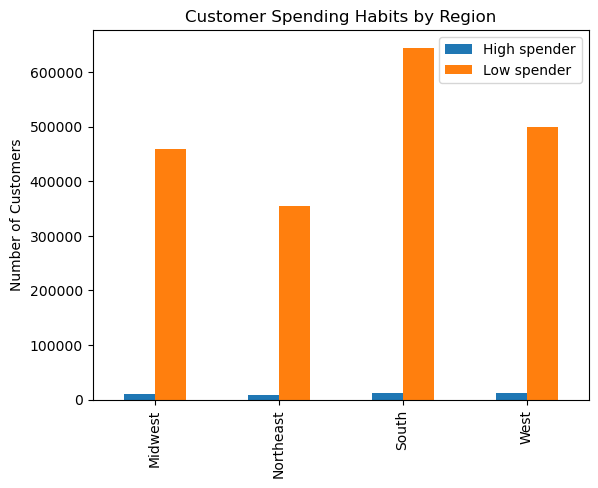

In [84]:
# Bar graph of the crosstab (for better understanding)

bar_reg_spend =  crosstab.plot.bar()

# Add title and axis labels
plt.title('Customer Spending Habits by Region')  # Set the title
plt.xlabel('')          # Label for the x-axis
plt.ylabel('Number of Customers')         # Label for the y-axis

# Remove the legend title
plt.legend(title='')  # Remove the title of the legend

### The Western Region has the highest number of High Spenders wheras the Northeast has the lowest amount. as well as low spenders, follwed by West then Midwest and finally Northeast. The Sounth has the highest number of low spenders. This difference may stem from to the differnt population size in differnt regions. All regions have by far more Low spenders than High Spenders.

In [86]:
# Save the figure

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_spending_flag.png')
plt.savefig(output_path)  # Save the figure to the specified path

<Figure size 640x480 with 0 Axes>

## 3. Flag and exclude low-activity customers

In [88]:
# Create a flag for customers with less than 5 orders

ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [89]:
ords_prods_cust_merge['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    1910884
low-activity customer       89116
Name: count, dtype: int64

In [90]:
# Exclude low-activity customers from the dataframe

df_excluded = ords_prods_cust_merge[ords_prods_cust_merge['activity_flag'] != 'low-activity customer']

In [91]:
# Export the new dataframe

df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared data', 'low_activity_excl.pkl'))

## 4. Create profiling variable for customers and choose visualisation

### 4.a Age

In [296]:
#Creating profiling variable using 'age'

ords_prods_cust_merge.loc[ords_prods_cust_merge['Age'] <= 25 ,'age_group'] = 'Young Adult'
ords_prods_cust_merge.loc[(ords_prods_cust_merge['Age'] > 25) & (ords_prods_cust_merge['Age'] <= 60) ,'age_group'] = 'Adult'
ords_prods_cust_merge.loc[ords_prods_cust_merge['Age'] >= 60 ,'age_group'] = 'Older Adult'

In [298]:
ords_prods_cust_merge['age_group'].value_counts()

age_group
Adult          1058164
Older Adult     680413
Young Adult     261423
Name: count, dtype: int64

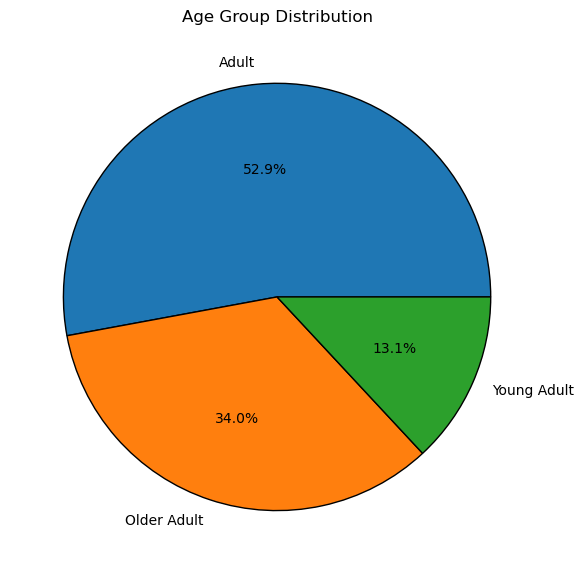

In [300]:
# Make a pie chart showing the distribution of age groups

pie_age_group_counts = ords_prods_cust_merge['age_group'].value_counts()
plt.figure(figsize=(6, 6))
age_group_pie_chart = pie_age_group_counts.plot.pie(autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Age Group Distribution')
plt.ylabel('')  # Removes the default y-axis label
plt.tight_layout()

In [97]:
# Save the figure

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_group_counts.png')
plt.savefig(output_path)  # Save the figure to the specified path

<Figure size 640x480 with 0 Axes>

### 4.b Dependants

In [99]:
# Create a dependents flag

ords_prods_cust_merge.loc[ords_prods_cust_merge['n_dependants'] == 0, 'dependants_flag'] = 'No Dependants'
ords_prods_cust_merge.loc[ords_prods_cust_merge['n_dependants'] >= 1, 'dependants_flag'] = 'Has Dependants'

In [100]:
# Check value counts

ords_prods_cust_merge['dependants_flag'].value_counts()

dependants_flag
Has Dependants    1509070
No Dependants      490930
Name: count, dtype: int64

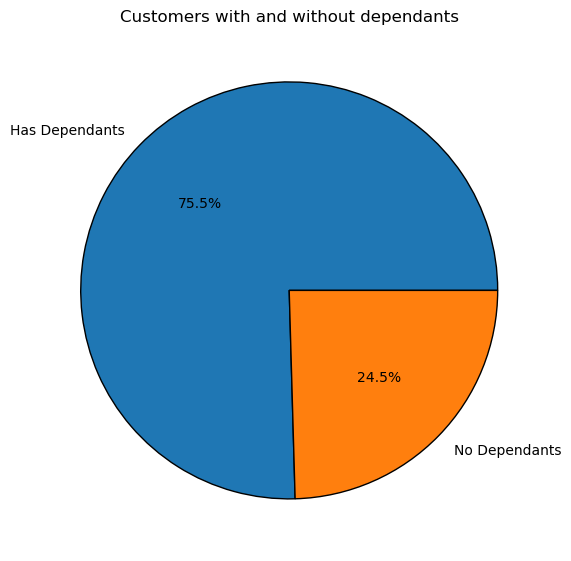

In [101]:
# Make a pie chart showing the distribution of customers with and without dependants

pie_dependants_counts = ords_prods_cust_merge['dependants_flag'].value_counts()
plt.figure(figsize=(6, 6))
dependants_pie_chart = pie_dependants_counts.plot.pie(autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Customers with and without dependants')
plt.ylabel('')  # Removes the default y-axis label
plt.tight_layout()

In [102]:
# Save the pie chart

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'pie_dependants.png')
plt.savefig(output_path)  # Save the figure to the specified path

<Figure size 640x480 with 0 Axes>

### 4.c Income

In [104]:
# create profiling variable using income

ords_prods_cust_merge.loc[ords_prods_cust_merge['income'] <= 45000 ,'income_group'] = 'Low Income'
ords_prods_cust_merge.loc[(ords_prods_cust_merge['income'] > 45000) & (ords_prods_cust_merge['income'] <= 120000) ,'income_group'] = 'Middle Income'
ords_prods_cust_merge.loc[ords_prods_cust_merge['income'] >= 120000 ,'income_group'] = 'High Income'

In [105]:
ords_prods_cust_merge['income_group'].value_counts(dropna = False)

income_group
Middle Income    1220283
High Income       600906
Low Income        178811
Name: count, dtype: int64

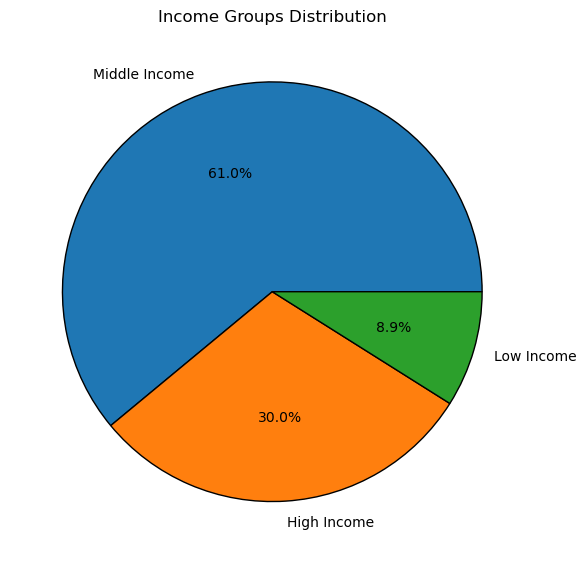

In [106]:
# Make a pie chart showing the distribution of income groups

pie_income_groups = ords_prods_cust_merge['income_group'].value_counts()
plt.figure(figsize=(6, 6))
income_groups_pie_chart = pie_income_groups.plot.pie(autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Income Groups Distribution')
plt.ylabel('')  # Removes the default y-axis label
plt.tight_layout()

In [107]:
# Save the pie chart

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'pie_income_groups.png')
plt.savefig(output_path)  # Save the figure to the specified path

<Figure size 640x480 with 0 Axes>

### 4.d Order Frequency by Department

In [109]:
# importing departments_wrangled data set

dept = pd.read_csv(os.path.join(path, '02 Data','Prepared data', 'departments_wrangled.csv'))

In [110]:
dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [111]:
# renaming 'Unnamed' column into 'department_id'

dept.rename (columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [112]:
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [113]:
# check for superflous columns in ords_prods_cust_merge

columns_list=ords_prods_cust_merge.columns.tolist()
print(columns_list)

['order_id', 'user_id', 'order_number', 'orders_day_of_the_week', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', 'Match', 'price_range_loc', 'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend', 'spending_flag', 'customer_frequency', 'frequency_flag', 'First Name', 'Surname', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'merge_status', 'region', 'activity_flag', 'age_group', 'dependants_flag', 'income_group']


In [114]:
# merge department data set with ords_prods_cust_merge

# ords_prods_cust_dep_merge = ords_prods_cust_merge.merge(dept, on='department_id', indicator='created')

In [115]:
# check column names

print(ords_prods_cust_merge.columns)
print(dept.columns)

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Match', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spending_flag', 'customer_frequency',
       'frequency_flag', 'First Name', 'Surname', 'Gender', 'State', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'merge_status',
       'region', 'activity_flag', 'age_group', 'dependants_flag',
       'income_group'],
      dtype='object')
Index(['department_id', 'department'], dtype='object')


In [116]:
# Rename the column in the 'dept' DataFrame

dept.rename(columns={'department _id': 'department_id'}, inplace=True)

In [117]:
# Verify the renaming

print(dept.columns)

Index(['department_id', 'department'], dtype='object')


In [118]:
# redo the merge btween department data set and ords_prods_cust_merge

ords_prods_cust_dep_merge = ords_prods_cust_merge.merge(dept, on='department_id', indicator='created')

In [119]:
# check column names

print(ords_prods_cust_dep_merge.columns)

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Match', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spending_flag', 'customer_frequency',
       'frequency_flag', 'First Name', 'Surname', 'Gender', 'State', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'merge_status',
       'region', 'activity_flag', 'age_group', 'dependants_flag',
       'income_group', 'department', 'created'],
      dtype='object')


In [120]:
# Exporting new dataframe with department merged 

ords_prods_cust_dep_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments.pkl'))

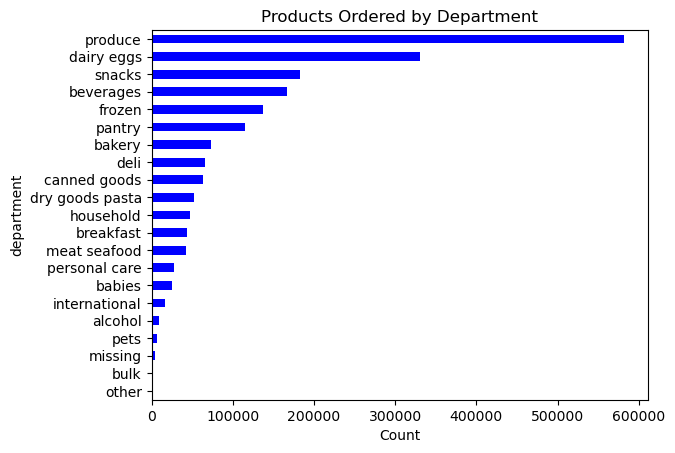

In [121]:
# create bar chart for frequency of orders by department
depts_bar = ords_prods_cust_dep_merge['department'].value_counts(ascending=True).plot(
    kind='barh',
    color='blue',  # Same color as before
    xlabel='Count',
    title='Products Ordered by Department'
)

In [122]:
# Get the default color cycle

default_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]  # First color in the cycle

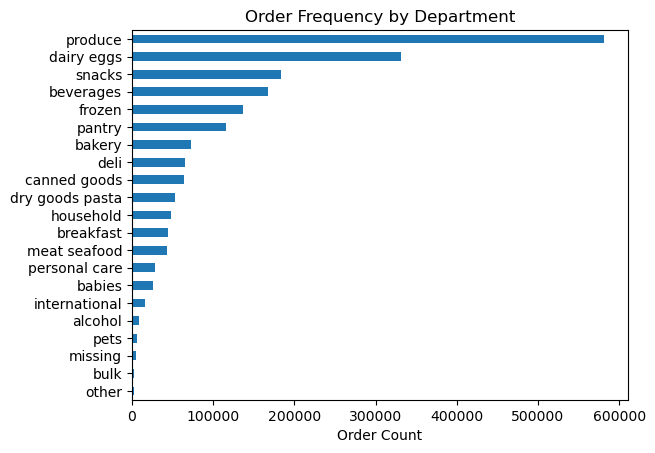

In [123]:
# apply retrieved colour to colour cycle

depts_bar = ords_prods_cust_dep_merge['department'].value_counts(ascending=True).plot(
    kind='barh',
    color=default_color,  # Use the color from the pie chart
    xlabel='Order Count',
    ylabel='',
    title='Order Frequency by Department'
)

In [124]:
# Save the chart

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'products_by_department.png')
plt.savefig(output_path)  # Save the figure to the specified path

<Figure size 640x480 with 0 Axes>

### 4.e Distribution of Brand Loyalty among Users

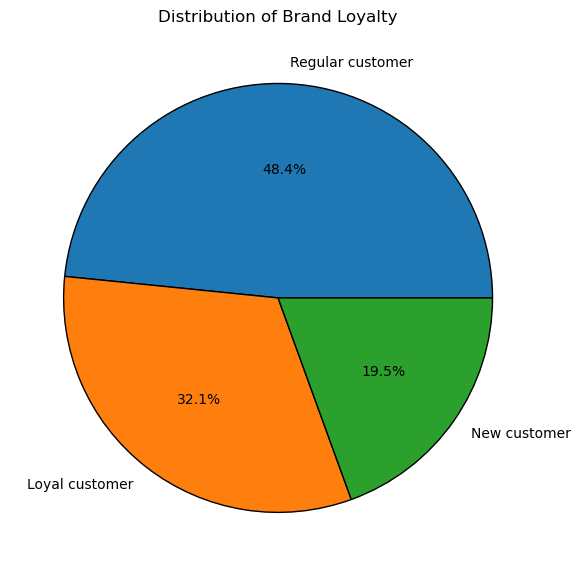

In [126]:
# show loyalty flag pie chart

pie_loyalty = ords_prods_cust_dep_merge['loyalty_flag'].value_counts()
plt.figure(figsize=(6, 6))
loyalty_pie_chart = pie_loyalty.plot.pie(autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Brand Loyalty')
plt.ylabel('')  # Removes the default y-axis label
plt.tight_layout()

In [127]:
# Save the pie chart

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_distribution.png')
plt.savefig(output_path)  # Save the figure to the specified path

<Figure size 640x480 with 0 Axes>

### 4.f Ordering Patterns by Loyalty Status

In [129]:
# crosstab Age with spending_flag

crosstab2 = pd.crosstab(ords_prods_cust_dep_merge['order_number'], ords_prods_cust_dep_merge['loyalty_flag'], dropna = False)

In [130]:
print(crosstab2)

loyalty_flag  Loyal customer  New customer  Regular customer
order_number                                                
1                      11925         67275             48685
2                      11013         67514             47330
3                      11690         67318             48143
4                      10976         54161             47740
5                      11290         42888             46897
...                      ...           ...               ...
95                      1021             0                 0
96                      1019             0                 0
97                      1005             0                 0
98                      1005             0                 0
99                       992             0                 0

[99 rows x 3 columns]


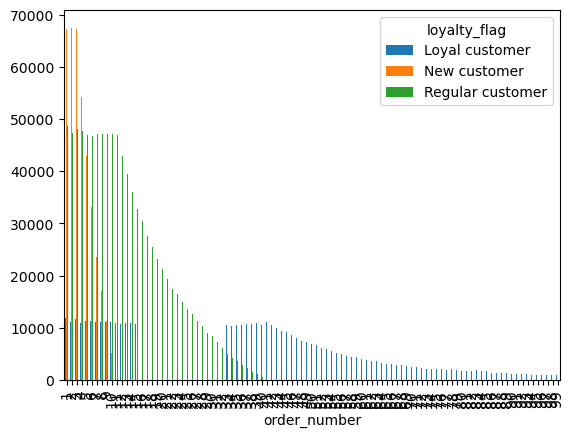

In [131]:
# Bar graph of the crosstab (for better understanding)

bar_orders_loyalty =  crosstab2.plot.bar()

In [132]:
# check order numbers

order_number_counts = ords_prods_cust_dep_merge['order_number'].value_counts()
print(order_number_counts)

order_number
1     127885
3     127151
2     125857
4     112877
5     101075
       ...  
96      1019
97      1005
98      1005
94      1004
99       992
Name: count, Length: 99, dtype: int64


In [133]:
# this viz is not very helpful due to the shear amount of unique order numbers

### 4.g Loyalty Status by Age Group

In [306]:
print(ords_prods_cust_dep_merge['age_group'].value_counts())

age_group
Adult          915670
Young Adult    200525
Name: count, dtype: int64


In [308]:
# crosstab busiest_days with spending_flag

crosstab3 = pd.crosstab(ords_prods_cust_dep_merge['loyalty_flag'], ords_prods_cust_dep_merge['age_group'], dropna = False)

In [310]:
print(crosstab3)

age_group          Adult  Young Adult
loyalty_flag                         
Loyal customer    287558        68538
New customer      179757        36529
Regular customer  448355        95458


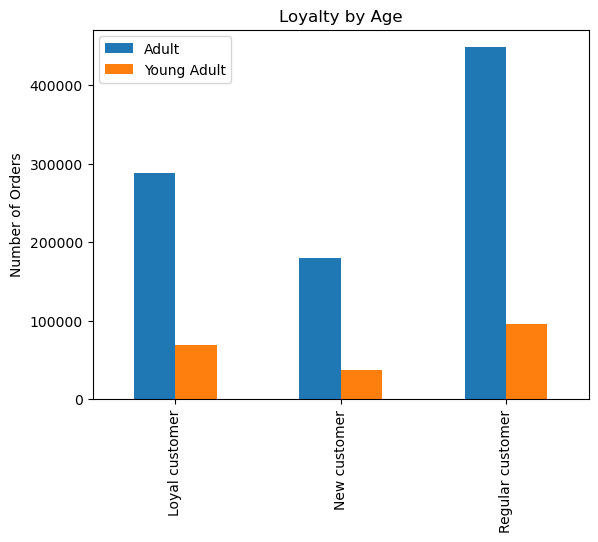

In [314]:
# Bar graph of the crosstab (for better understanding)

bar_order_day_loyalty =  crosstab3.plot.bar()

# Add title and axis labels
plt.title('Loyalty by Age')  # Set the title
plt.xlabel('')          # Label for the x-axis
plt.ylabel('Number of Orders')         # Label for the y-axis

# Remove the legend title
plt.legend(title='')  # Remove the title of the legend

In [283]:
# Save the chart

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_age_group.png')
plt.savefig(output_path)  # Save the figure to the specified path

<Figure size 640x480 with 0 Axes>

### 4.h Age by spending_flag

In [140]:
# crosstab Age with spending_flag

crosstab4 = pd.crosstab(ords_prods_cust_dep_merge['age_group'], ords_prods_cust_dep_merge['spending_flag'], dropna = False)

In [141]:
print(crosstab4)

spending_flag  High spender  Low spender
age_group                               
Adult                 27244      1182792
Older Adult           12756       515785
Young Adult            3109       258314


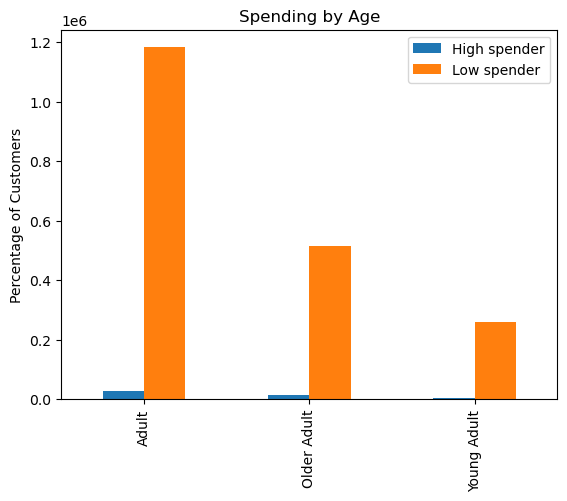

In [142]:
# Bar graph of the crosstab (for better understanding)

bar_age_spend =  crosstab4.plot.bar()

# Add title and axis labels
plt.title('Spending by Age')  # Set the title
plt.xlabel('')          # Label for the x-axis
plt.ylabel('Percentage of Customers')         # Label for the y-axis

# Remove the legend title
plt.legend(title='')  # Remove the title of the legend

In [143]:
# Save the chart

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_spend.png')
plt.savefig(output_path)  # Save the figure to the specified path

<Figure size 640x480 with 0 Axes>

### 4.i Young and Older Parents

In [145]:
# which variables are in the fam_status column

ords_prods_cust_dep_merge['fam_status'].unique()

array(['married', 'divorced/widowed', 'single',
       'living with parents and siblings'], dtype=object)

In [146]:
# create a profile column for young parent

ords_prods_cust_dep_merge.loc[
    (ords_prods_cust_dep_merge['age_group'] == 'Young Adult') & 
    (ords_prods_cust_dep_merge['n_dependants'] > 0),
    'profile'
] = 'Young Parent'

In [147]:
ords_prods_cust_dep_merge['profile'].value_counts(dropna = False)

profile
NaN             1799475
Young Parent     200525
Name: count, dtype: int64

In [148]:
# create a profile column for older parent

ords_prods_cust_dep_merge.loc[
    (ords_prods_cust_dep_merge['age_group'] == 'Adult') & 
    (ords_prods_cust_dep_merge['n_dependants'] > 0),
    'profile'
] = 'Older Parent'

In [149]:
ords_prods_cust_dep_merge['profile'].value_counts(dropna = False)

profile
Older Parent    915670
NaN             883805
Young Parent    200525
Name: count, dtype: int64

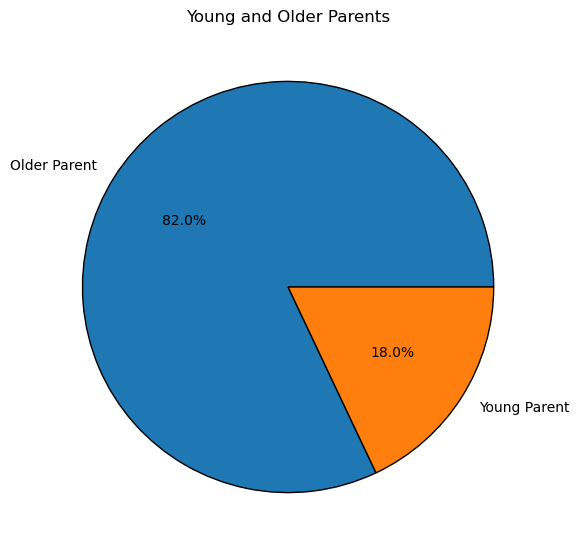

In [150]:
# Make a pie chart showing the percentage of young and older parent

pie_parents = ords_prods_cust_dep_merge['profile'].value_counts()
plt.figure(figsize=(6, 6))
parents_pie_chart = pie_parents.plot.pie(autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Young and Older Parents')
plt.ylabel('')  # Removes the default y-axis label
plt.tight_layout()

In [151]:
# Save the chart

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'pie_young_old_parents.png')
plt.savefig(output_path)  # Save the figure to the specified path

<Figure size 640x480 with 0 Axes>

### 4.j Parenthood and Product Types

In [153]:
# crosstab Parenthood with Product Types

crosstab5 = pd.crosstab(ords_prods_cust_dep_merge['profile'], ords_prods_cust_dep_merge['department'], dropna = False)

In [154]:
print(crosstab5)

department    alcohol  babies  bakery  beverages  breakfast  bulk  \
profile                                                             
Older Parent     4205   11027   32758      75650      20462  1108   
Young Parent     1255    2537    7448      16906       4452   263   
NaN              3442   11856   32966      74828      19048   852   

department    canned goods  dairy eggs   deli  dry goods pasta  ...  \
profile                                                         ...   
Older Parent         29311      151235  30512            23635  ...   
Young Parent          6384       34563   6201             5217  ...   
NaN                  28032      145392  28853            23773  ...   

department    household  international  meat seafood  missing  other  pantry  \
profile                                                                        
Older Parent      21145           7437         19665     1876    939   52747   
Young Parent       5499           1588          4035      

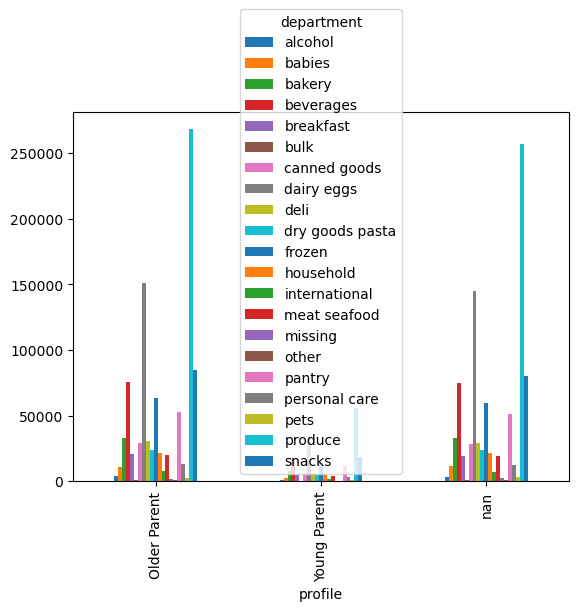

In [155]:
# Bar graph of the crosstab (for better understanding)

bar_parent_age_product_type =  crosstab5.plot.bar()

In [156]:
# Remove rows with NaN in the 'profile' column

ords_prods_cust_dep_merge = ords_prods_cust_dep_merge.dropna(subset=['profile'])

In [157]:
# Confirm the NaN values are gone

print(ords_prods_cust_dep_merge['profile'].isna().sum())

0


In [158]:
# crosstab Parenthood with Product Types

crosstab5 = pd.crosstab(ords_prods_cust_dep_merge['profile'], ords_prods_cust_dep_merge['department'], dropna = False)

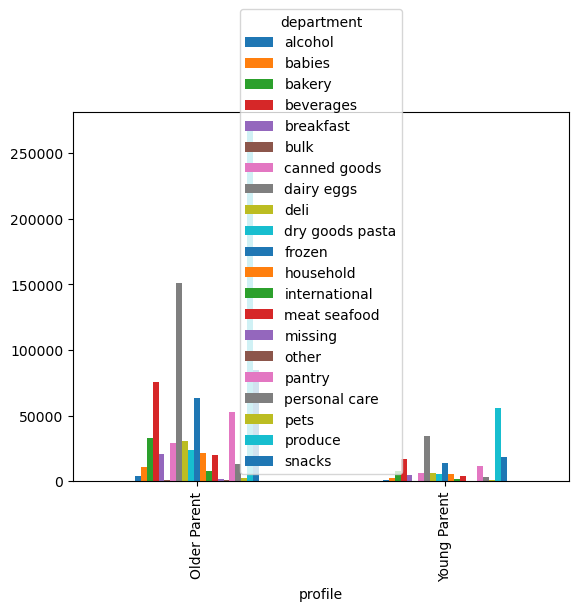

In [159]:
# Bar graph of the crosstab (for better understanding)

bar_parent_age_product_type =  crosstab5.plot.bar()

In [160]:
# Get the top five departments

top_departments = ords_prods_cust_dep_merge['department'].value_counts().head(5).index
print(top_departments)

Index(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'], dtype='object', name='department')


In [161]:
# Create the crosstab and filter for top five departments
crosstab5 = pd.crosstab(
    ords_prods_cust_dep_merge['profile'], 
    ords_prods_cust_dep_merge['department'], 
    dropna=False
)

# Filter columns to include only the top five departments
crosstab5_filtered = crosstab5[top_departments]

# Display the filtered crosstab
print(crosstab5_filtered)

department    produce  dairy eggs  snacks  beverages  frozen
profile                                                     
Older Parent   268380      151235   84650      75650   63565
Young Parent    55911       34563   18392      16906   13604


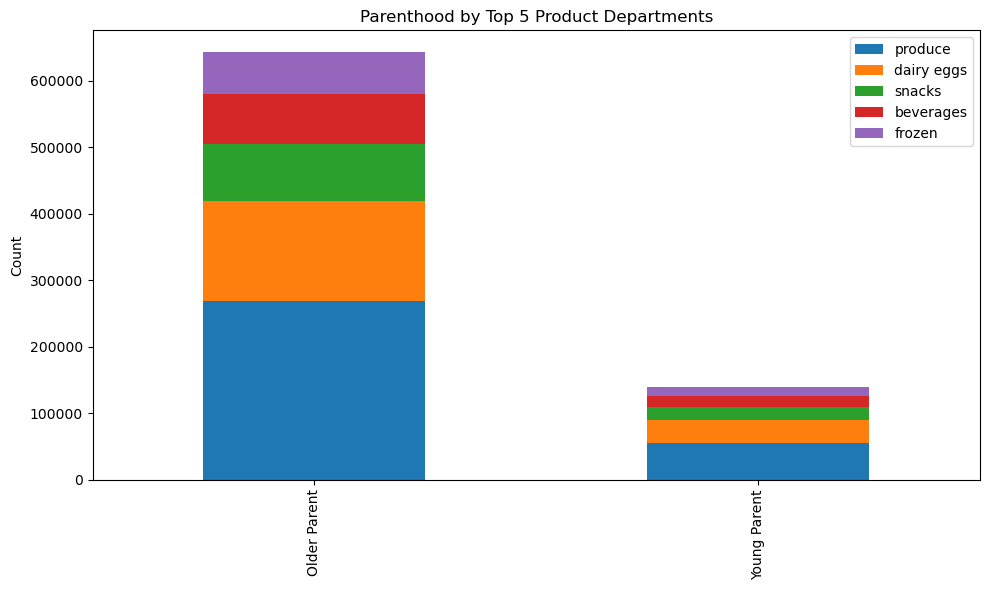

In [162]:
bar_chart = crosstab5_filtered.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add title and axis labels
plt.title('Parenthood by Top 5 Product Departments')
plt.xlabel('')
plt.ylabel('Count')

# Add a legend with custom labels if needed
plt.legend(labels=crosstab5_filtered.columns, title='')  # Explicitly provide labels
plt.tight_layout()
plt.show()

In [163]:
# Save the chart

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'bar_parents_departments.png')
plt.savefig(output_path)  # Save the figure to the specified path

<Figure size 640x480 with 0 Axes>

### 4.k Income and Price Range

In [165]:
# Rename the price_range_loc column

ords_prods_cust_dep_merge.rename(columns={'price_range_loc': 'price_range'}, inplace=True)

In [166]:
crosstab6 = pd.crosstab(ords_prods_cust_dep_merge['income_group'], ords_prods_cust_dep_merge['price_range'], dropna = True)

In [167]:

print(crosstab6)

price_range    High-range product  Low-range product  Mid-range product
income_group                                                           
High Income                  3952              80976             184008
Low Income                    489              45976              61823
Middle Income                9174             224387             505410


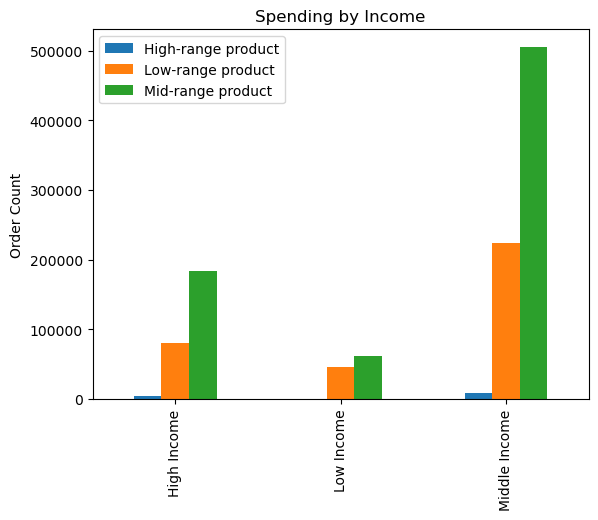

In [168]:
# Bar graph of the crosstab (for better understanding)

bar_income_spendavg =  crosstab6.plot.bar()

# Add title and axis labels
plt.title('Spending by Income')  # Set the title
plt.xlabel('')          # Label for the x-axis
plt.ylabel('Order Count')         # Label for the y-axis

# Remove the legend title
plt.legend(title='')  # Remove the title of the legend

In [169]:
# Save the chart

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'income_price_range.png')
plt.savefig(output_path)  # Save the figure to the specified path

<Figure size 640x480 with 0 Axes>

### 4.l Income and Order Frequency

In [171]:
crosstab7 = pd.crosstab(ords_prods_cust_dep_merge['income_group'], ords_prods_cust_dep_merge['frequency_flag'], dropna = True)

In [172]:
print(crosstab7)

frequency_flag  Frequent customer  Non-frequent customer  Regular customer
income_group                                                              
High Income                177187                  27413             64336
Low Income                  67732                  14332             26224
Middle Income              500872                  80289            157810


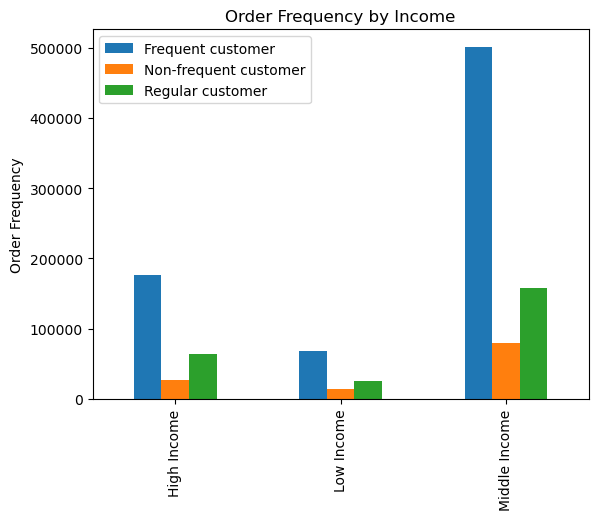

In [173]:
# Bar graph of the crosstab (for better understanding)

bar_income_order_frequency =  crosstab7.plot.bar()

# Add title and axis labels
plt.title('Order Frequency by Income')  # Set the title
plt.xlabel('')          # Label for the x-axis
plt.ylabel('Order Frequency')         # Label for the y-axis

# Remove the legend title
plt.legend(title='')  # Remove the title of the legend

In [174]:
# Save the chart

output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'income_frequency_flag.png')
plt.savefig(output_path)  # Save the figure to the specified path

<Figure size 640x480 with 0 Axes>

## 5. Max, mean, and min for usage frequency and expenditure

In [176]:
# check column names

print(ords_prods_cust_dep_merge.columns)

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Match', 'price_range', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spending_flag', 'customer_frequency',
       'frequency_flag', 'First Name', 'Surname', 'Gender', 'State', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'merge_status',
       'region', 'activity_flag', 'age_group', 'dependants_flag',
       'income_group', 'department', 'created', 'profile'],
      dtype='object')


In [177]:
# Create a subset of customer profiles and show the total price of each order

customer_profile = ords_prods_cust_dep_merge.groupby(['user_id','State', 'region', 'n_dependants', 'fam_status', 'age_group', 'order_number', 'orders_day_of_the_week', 'order_hour_of_day', 'loyalty_flag', 'customer_frequency', 'dependants_flag', 'income_group', 'spending_flag'])['prices'].sum().reset_index()

In [178]:
customer_profile.head()

,user_id,State,region,n_dependants,fam_status,age_group,order_number,orders_day_of_the_week,order_hour_of_day,loyalty_flag,customer_frequency,dependants_flag,income_group,spending_flag,prices
0,1,Alabama,South,3,married,Adult,1,2,8,New customer,20.5,Has Dependants,Low Income,Low spender,31.6
1,1,Alabama,South,3,married,Adult,2,3,7,New customer,20.5,Has Dependants,Low Income,Low spender,35.4
2,1,Alabama,South,3,married,Adult,3,3,12,New customer,20.5,Has Dependants,Low Income,Low spender,28.2
3,1,Alabama,South,3,married,Adult,4,4,7,New customer,20.5,Has Dependants,Low Income,Low spender,26.0
4,1,Alabama,South,3,married,Adult,5,4,15,New customer,20.5,Has Dependants,Low Income,Low spender,57.0


In [179]:
# Aggregate variables for customer profiles for expenditure

customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [180]:
customer_agg

order_number           prices                  
                 max min  mean    max   min        mean
user_id                                                
1                 10   1   5.5   63.1  25.0   37.570000
3                 12   1   6.5  107.2  30.7   60.116667
4                  5   1   3.0   63.4  10.8   29.540000
6                  3   1   2.0   55.4  22.4   39.533333
7                 20   1  10.5  166.7   6.3   76.910000
...              ...  ..   ...    ...   ...         ...
12852              9   1   5.0  159.7  38.1   82.888889
12853             70   1  35.5  288.0  14.7  123.171429
12855             17   1   9.0  242.1  42.1  138.764706
12856             53   1  27.0  270.4  10.2  101.554717
12858             10   1   5.5  113.6  36.8   73.180000

[7214 rows x 6 columns]

In [181]:
# Aggregate variables for customer profiles for usage frequency
freq_agg = ords_prods_cust_dep_merge.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [182]:
freq_agg

order_number                days_since_prior_order                 
                 max min       mean                    max   min       mean
user_id                                                                    
1                 10   1   5.813559                   30.0   0.0  20.259259
3                 12   1   6.000000                   21.0   7.0  11.487179
4                  5   1   2.888889                   21.0   0.0  15.357143
6                  3   1   1.928571                   12.0   6.0   7.800000
7                 20   1   9.645631                   30.0   2.0  13.546392
...              ...  ..        ...                    ...   ...        ...
12852              9   1   5.087719                   24.0  10.0  14.087379
12853             70   1  42.831647                   30.0   0.0   4.495798
12855             17   1   9.490975                   30.0   0.0  16.537313
12856             53   1  25.941417                   30.0   0.0   7.117483
12858             10   1   5.737864                   30.0   8.0  16.454545

[7214 rows x 6 columns]